# Import data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import get_train_data_only

df_teams, df_BLUE, df_RED = get_train_data_only()

In [3]:
#How many data points we have
len(df_teams), len(df_BLUE) 

(35318, 176590)

In [4]:
df_teams.head()

,id,start,patch,winner,duration,teams.BLUE.name,teams.BLUE.total_turret_kills,teams.BLUE.total_inhibitor_kills,teams.BLUE.total_rift_herald_kills,teams.BLUE.total_dragon_kills,teams.BLUE.total_baron_kills,teams.BLUE.side,teams.RED.name,teams.RED.total_turret_kills,teams.RED.total_inhibitor_kills,teams.RED.total_rift_herald_kills,teams.RED.total_dragon_kills,teams.RED.total_baron_kills,teams.RED.side,year
31563,LMS/2016 Season/Spring Season/Scoreboards_3_2,None,5.24,BLUE,1486,Hong Kong Esports,10,1,2,3,1,BLUE,Midnight Sun Esports,2,0,0,0,0,RED,2015
31596,LJL/2016 Season/Spring Season/Scoreboards_1_2,None,5.24,RED,2108,Unsold Stuff Gaming,3,0,1,1,0,BLUE,7th heaven,10,3,0,4,1,RED,2015
31595,LJL/2016 Season/Spring Season/Scoreboards_1_1,None,5.24,RED,2319,7th heaven,5,0,1,0,0,BLUE,Unsold Stuff Gaming,10,2,0,5,2,RED,2015
31588,CBLOL/2016 Season/Split 1/Scoreboards_2_2,None,5.24,BLUE,2535,Operation Kino e-Sports,8,1,0,1,2,BLUE,CNB e-Sports Club,9,1,1,4,0,RED,2015
31587,CBLOL/2016 Season/Split 1/Scoreboards_2_1,None,5.24,RED,4397,CNB e-Sports Club,11,5,1,5,3,BLUE,Operation Kino e-Sports,9,1,0,5,1,RED,2015


In [5]:
df_RED.head()


,name,id,role,champion_name,champion_id,gold_15,kills_assists_15,deaths_15,total_gold,total_cs,total_kills,total_monster_kills,total_assists,total_deaths,total_damage_taken,total_damage_dealt,win,side,game_id
0,DreamSha,153644.0,TOP,Malphite,54,4154.0,1.0,2.0,6938,146,0,8,1,2,10936,60317,False,RED,LMS/2016 Season/Spring Season/Scoreboards_3_2
1,Wulala,204863.0,JGL,Kindred,203,4021.0,2.0,4.0,6906,79,1,56,1,4,15407,72096,False,RED,LMS/2016 Season/Spring Season/Scoreboards_3_2
2,Mission,180941.0,MID,Kassadin,38,4944.0,1.0,3.0,7819,178,1,4,0,3,14777,84528,False,RED,LMS/2016 Season/Spring Season/Scoreboards_3_2
3,Payne,192390.0,BOT,Tristana,18,4197.0,0.0,3.0,7731,185,0,5,0,3,12551,89701,False,RED,LMS/2016 Season/Spring Season/Scoreboards_3_2
4,SkuLL,197834.0,SUP,Alistar,12,2726.0,1.0,7.0,4986,19,0,0,1,7,19427,8778,False,RED,LMS/2016 Season/Spring Season/Scoreboards_3_2


# Feature Engineering

In [6]:
import numpy as np
import pandas as pd

In [7]:
df_b = df_BLUE.groupby('champion_id').count()
df_r = df_RED.groupby('champion_id').count()
df_frequency = pd.DataFrame(df_b.max(axis=1), columns=['champ_id_blue'])
df_frequency['champ_id_red'] = df_r.max(axis=1)
df_frequency.sample(5)

,champ_id_blue,champ_id_red
champion_id,,
101,114,161
143,593,602
84,1360,1090
53,384,473
497,2573,2402


<AxesSubplot:xlabel='champion_id'>

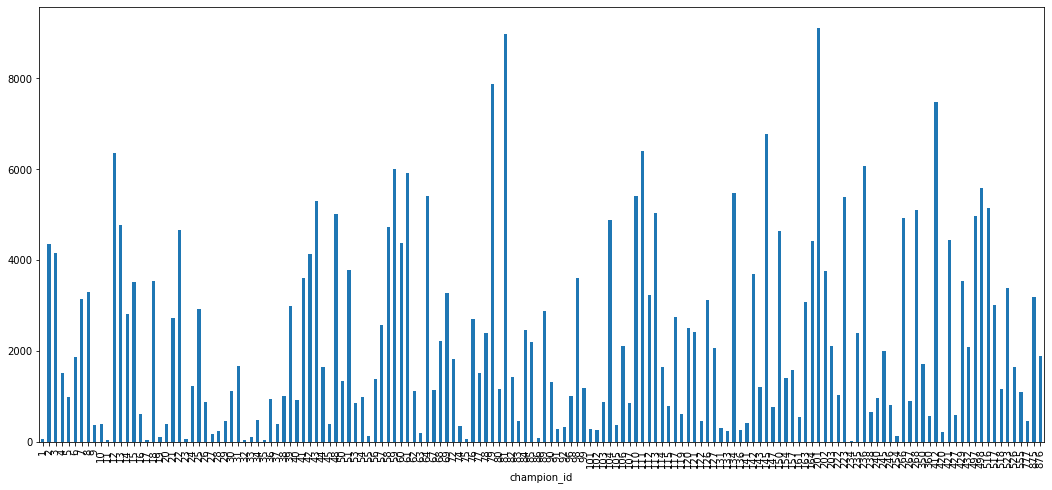

In [8]:
#total times a champion played
df_frequency.sum(axis=1).plot.bar(figsize=(18,8))

In [9]:
min_played = df_frequency.sum(axis=1).min()
df_frequency.sum(axis=1)[df_frequency.sum(axis=1) == min_played]

champion_id
234    9
dtype: int64

In [10]:
max_played = df_frequency.sum(axis=1).max()
df_frequency.sum(axis=1)[df_frequency.sum(axis=1) == max_played]

champion_id
201    9119
dtype: int64

## Synergy between champions in the same team

In [11]:
df_BLUE_lite_synergy = df_BLUE[['champion_id', 'win', 'game_id']]
df_BLUE_lite_synergy

,champion_id,win,game_id
0,13,True,LMS/2016 Season/Spring Season/Scoreboards_3_2
1,421,True,LMS/2016 Season/Spring Season/Scoreboards_3_2
2,81,True,LMS/2016 Season/Spring Season/Scoreboards_3_2
3,429,True,LMS/2016 Season/Spring Season/Scoreboards_3_2
4,412,True,LMS/2016 Season/Spring Season/Scoreboards_3_2
...,...,...,...
176585,79,True,Magyar Nemzeti E-sport Bajnokság/Season 3/Scor...
176586,245,True,Magyar Nemzeti E-sport Bajnokság/Season 3/Scor...
176587,64,True,Magyar Nemzeti E-sport Bajnokság/Season 3/Scor...
176588,222,True,Magyar Nemzeti E-sport Bajnokság/Season 3/Scor...


In [12]:
df_RED_lite_synergy = df_RED[['champion_id', 'win', 'game_id']]
df_RED_lite_synergy

,champion_id,win,game_id
0,54,False,LMS/2016 Season/Spring Season/Scoreboards_3_2
1,203,False,LMS/2016 Season/Spring Season/Scoreboards_3_2
2,38,False,LMS/2016 Season/Spring Season/Scoreboards_3_2
3,18,False,LMS/2016 Season/Spring Season/Scoreboards_3_2
4,12,False,LMS/2016 Season/Spring Season/Scoreboards_3_2
...,...,...,...
176585,58,False,Magyar Nemzeti E-sport Bajnokság/Season 3/Scor...
176586,106,False,Magyar Nemzeti E-sport Bajnokság/Season 3/Scor...
176587,517,False,Magyar Nemzeti E-sport Bajnokság/Season 3/Scor...
176588,110,False,Magyar Nemzeti E-sport Bajnokság/Season 3/Scor...


In [13]:
df_result = pd.concat([df_BLUE_lite_synergy, df_RED_lite_synergy])
df_result

,champion_id,win,game_id
0,13,True,LMS/2016 Season/Spring Season/Scoreboards_3_2
1,421,True,LMS/2016 Season/Spring Season/Scoreboards_3_2
2,81,True,LMS/2016 Season/Spring Season/Scoreboards_3_2
3,429,True,LMS/2016 Season/Spring Season/Scoreboards_3_2
4,412,True,LMS/2016 Season/Spring Season/Scoreboards_3_2
...,...,...,...
176585,58,False,Magyar Nemzeti E-sport Bajnokság/Season 3/Scor...
176586,106,False,Magyar Nemzeti E-sport Bajnokság/Season 3/Scor...
176587,517,False,Magyar Nemzeti E-sport Bajnokság/Season 3/Scor...
176588,110,False,Magyar Nemzeti E-sport Bajnokság/Season 3/Scor...


In [14]:
df_result['outcome'] = df_result['win']*1
df_result

,champion_id,win,game_id,outcome
0,13,True,LMS/2016 Season/Spring Season/Scoreboards_3_2,1
1,421,True,LMS/2016 Season/Spring Season/Scoreboards_3_2,1
2,81,True,LMS/2016 Season/Spring Season/Scoreboards_3_2,1
3,429,True,LMS/2016 Season/Spring Season/Scoreboards_3_2,1
4,412,True,LMS/2016 Season/Spring Season/Scoreboards_3_2,1
...,...,...,...,...
176585,58,False,Magyar Nemzeti E-sport Bajnokság/Season 3/Scor...,0
176586,106,False,Magyar Nemzeti E-sport Bajnokság/Season 3/Scor...,0
176587,517,False,Magyar Nemzeti E-sport Bajnokság/Season 3/Scor...,0
176588,110,False,Magyar Nemzeti E-sport Bajnokság/Season 3/Scor...,0


In [15]:
df_result.index = df_result.game_id
df_result

,champion_id,win,game_id,outcome
game_id,,,,
LMS/2016 Season/Spring Season/Scoreboards_3_2,13,True,LMS/2016 Season/Spring Season/Scoreboards_3_2,1
LMS/2016 Season/Spring Season/Scoreboards_3_2,421,True,LMS/2016 Season/Spring Season/Scoreboards_3_2,1
LMS/2016 Season/Spring Season/Scoreboards_3_2,81,True,LMS/2016 Season/Spring Season/Scoreboards_3_2,1
LMS/2016 Season/Spring Season/Scoreboards_3_2,429,True,LMS/2016 Season/Spring Season/Scoreboards_3_2,1
LMS/2016 Season/Spring Season/Scoreboards_3_2,412,True,LMS/2016 Season/Spring Season/Scoreboards_3_2,1
...,...,...,...,...
Magyar Nemzeti E-sport Bajnokság/Season 3/Scoreboards/Week 3_5_1,58,False,Magyar Nemzeti E-sport Bajnokság/Season 3/Scor...,0
Magyar Nemzeti E-sport Bajnokság/Season 3/Scoreboards/Week 3_5_1,106,False,Magyar Nemzeti E-sport Bajnokság/Season 3/Scor...,0
Magyar Nemzeti E-sport Bajnokság/Season 3/Scoreboards/Week 3_5_1,517,False,Magyar Nemzeti E-sport Bajnokság/Season 3/Scor...,0


In [16]:
game_id_unique = np.unique(df_result.game_id)
len(game_id_unique)

35318

In [45]:
champions_id_unique = np.unique(df_result.champion_id)
champions_id_unique, len(champions_id_unique) 

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  48,  50,  51,  53,  54,  55,  56,
         57,  58,  59,  60,  61,  62,  63,  64,  67,  68,  69,  72,  74,
         75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  89,
         90,  91,  92,  96,  98,  99, 101, 102, 103, 104, 105, 106, 107,
        110, 111, 112, 113, 114, 115, 117, 119, 120, 121, 122, 126, 127,
        131, 133, 134, 136, 141, 142, 143, 145, 147, 150, 154, 157, 161,
        163, 164, 201, 202, 203, 222, 223, 234, 235, 236, 238, 240, 245,
        246, 254, 266, 267, 268, 350, 360, 412, 420, 421, 427, 429, 432,
        497, 498, 516, 517, 518, 523, 526, 555, 777, 875, 876, 887]),
 155)

In [46]:
champions_won_together = pd.DataFrame(np.zeros([len(champions_id_unique), len(champions_id_unique)]), columns=champions_id_unique, index=champions_id_unique)
champions_won_together

,1,2,3,4,5,6,7,8,9,10,...,516,517,518,523,526,555,777,875,876,887
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
champions_play_together = pd.DataFrame(np.zeros([len(champions_id_unique), len(champions_id_unique)]), columns=champions_id_unique, index=champions_id_unique)
champions_play_together

,1,2,3,4,5,6,7,8,9,10,...,516,517,518,523,526,555,777,875,876,887
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
game_id_unique[:1]

array(['2016 International Wildcard Invitational/Scoreboards/Bracket Stage_1_1'],
      dtype=object)

In [21]:
from tqdm import tqdm

##remove data that is faulty, champions playing in the red and blue team simultaneously in a game
count = 0
for game in tqdm(game_id_unique):
    value = list(df_result.loc[game, 'champion_id'])
    unique_champions_per_game = set(value)
    if len(unique_champions_per_game) == 10:
        continue
    else:
        print(game)
        print(value)

In [48]:
for champion_a in tqdm(champions_id_unique):
    champions_played_together_list = list(df_result.loc[df_result[df_result.champion_id == champion_a].index]['champion_id'])
    for champion_b in champions_played_together_list:
        if champion_a == champion_b:
            continue
        else:
            champions_play_together.loc[champion_a][champion_b] += 1

100%|██████████████████████████████████████████████████████████████| 155/155 [04:58<00:00,  1.93s/it]


In [49]:
#number of times that champions played together
champions_play_together

,1,2,3,4,5,6,7,8,9,10,...,516,517,518,523,526,555,777,875,876,887
1,0.0,10.0,6.0,2.0,1.0,4.0,6.0,0.0,2.0,1.0,...,8.0,3.0,2.0,2.0,6.0,3.0,5.0,3.0,6.0,0.0
2,10.0,0.0,577.0,182.0,59.0,257.0,378.0,347.0,26.0,72.0,...,729.0,393.0,176.0,484.0,344.0,114.0,65.0,363.0,187.0,0.0
3,6.0,577.0,0.0,172.0,142.0,313.0,278.0,431.0,43.0,55.0,...,486.0,334.0,113.0,309.0,162.0,81.0,77.0,274.0,315.0,0.0
4,2.0,182.0,172.0,0.0,17.0,55.0,43.0,55.0,13.0,18.0,...,213.0,144.0,27.0,253.0,153.0,46.0,23.0,206.0,158.0,0.0
5,1.0,59.0,142.0,17.0,0.0,244.0,132.0,137.0,28.0,7.0,...,136.0,80.0,40.0,16.0,11.0,62.0,5.0,16.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,3.0,114.0,81.0,46.0,62.0,70.0,105.0,141.0,31.0,7.0,...,115.0,170.0,116.0,39.0,5.0,0.0,2.0,53.0,14.0,0.0
777,5.0,65.0,77.0,23.0,5.0,14.0,8.0,13.0,3.0,6.0,...,71.0,36.0,3.0,52.0,120.0,2.0,0.0,32.0,214.0,1.0
875,3.0,363.0,274.0,206.0,16.0,51.0,300.0,138.0,35.0,47.0,...,742.0,263.0,45.0,904.0,144.0,53.0,32.0,0.0,288.0,0.0
876,6.0,187.0,315.0,158.0,3.0,60.0,40.0,40.0,6.0,10.0,...,303.0,140.0,25.0,229.0,502.0,14.0,214.0,288.0,0.0,0.0


In [50]:
for champ_a in tqdm(champions_id_unique):
    champ_played_together_won_list = list(df_result.loc[df_result[(df_result.champion_id == champ_a) & (df_result.outcome == 1)].index]['champion_id'])
    for champ_b in champ_played_together_won_list:
        if champ_a == champ_b:
            continue
        else:
            champions_won_together.loc[champ_a][champ_b] += 1

100%|██████████████████████████████████████████████████████████████| 155/155 [02:05<00:00,  1.24it/s]


In [51]:
##number of times that champions played and won together
champions_won_together

,1,2,3,4,5,6,7,8,9,10,...,516,517,518,523,526,555,777,875,876,887
1,0.0,5.0,1.0,1.0,1.0,3.0,2.0,0.0,1.0,1.0,...,1.0,1.0,0.0,2.0,5.0,0.0,5.0,0.0,3.0,0.0
2,4.0,0.0,303.0,96.0,39.0,136.0,210.0,190.0,15.0,39.0,...,374.0,207.0,97.0,246.0,168.0,56.0,34.0,182.0,96.0,0.0
3,3.0,279.0,0.0,79.0,65.0,150.0,142.0,226.0,27.0,25.0,...,239.0,165.0,57.0,151.0,86.0,37.0,39.0,128.0,177.0,0.0
4,1.0,98.0,98.0,0.0,6.0,26.0,26.0,33.0,7.0,5.0,...,123.0,83.0,15.0,143.0,77.0,32.0,15.0,124.0,87.0,0.0
5,1.0,22.0,60.0,7.0,0.0,115.0,70.0,64.0,12.0,5.0,...,55.0,39.0,14.0,4.0,4.0,33.0,3.0,6.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,1.0,56.0,32.0,16.0,34.0,39.0,52.0,65.0,20.0,4.0,...,54.0,75.0,56.0,13.0,3.0,0.0,1.0,21.0,9.0,0.0
777,1.0,33.0,38.0,9.0,4.0,7.0,6.0,5.0,1.0,2.0,...,32.0,21.0,1.0,25.0,65.0,1.0,0.0,18.0,112.0,1.0
875,3.0,189.0,131.0,99.0,10.0,26.0,154.0,80.0,16.0,26.0,...,395.0,131.0,21.0,494.0,76.0,24.0,12.0,0.0,142.0,0.0
876,2.0,92.0,158.0,71.0,2.0,27.0,22.0,24.0,4.0,6.0,...,154.0,78.0,13.0,112.0,253.0,9.0,109.0,141.0,0.0,0.0


In [52]:
champions_won_percentage = champions_won_together.div(champions_play_together)
champions_won_percentage

,1,2,3,4,5,6,7,8,9,10,...,516,517,518,523,526,555,777,875,876,887
1,NaN,0.500000,0.166667,0.500000,1.000000,0.750000,0.333333,NaN,0.500000,1.000000,...,0.125000,0.333333,0.000000,1.000000,0.833333,0.000000,1.000000,0.000000,0.500000,NaN
2,0.400000,NaN,0.525130,0.527473,0.661017,0.529183,0.555556,0.547550,0.576923,0.541667,...,0.513032,0.526718,0.551136,0.508264,0.488372,0.491228,0.523077,0.501377,0.513369,NaN
3,0.500000,0.483536,NaN,0.459302,0.457746,0.479233,0.510791,0.524362,0.627907,0.454545,...,0.491770,0.494012,0.504425,0.488673,0.530864,0.456790,0.506494,0.467153,0.561905,NaN
4,0.500000,0.538462,0.569767,NaN,0.352941,0.472727,0.604651,0.600000,0.538462,0.277778,...,0.577465,0.576389,0.555556,0.565217,0.503268,0.695652,0.652174,0.601942,0.550633,NaN
5,1.000000,0.372881,0.422535,0.411765,NaN,0.471311,0.530303,0.467153,0.428571,0.714286,...,0.404412,0.487500,0.350000,0.250000,0.363636,0.532258,0.600000,0.375000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.333333,0.491228,0.395062,0.347826,0.548387,0.557143,0.495238,0.460993,0.645161,0.571429,...,0.469565,0.441176,0.482759,0.333333,0.600000,NaN,0.500000,0.396226,0.642857,NaN
777,0.200000,0.507692,0.493506,0.391304,0.800000,0.500000,0.750000,0.384615,0.333333,0.333333,...,0.450704,0.583333,0.333333,0.480769,0.541667,0.500000,NaN,0.562500,0.523364,1.0
875,1.000000,0.520661,0.478102,0.480583,0.625000,0.509804,0.513333,0.579710,0.457143,0.553191,...,0.532345,0.498099,0.466667,0.546460,0.527778,0.452830,0.375000,NaN,0.493056,NaN
876,0.333333,0.491979,0.501587,0.449367,0.666667,0.450000,0.550000,0.600000,0.666667,0.600000,...,0.508251,0.557143,0.520000,0.489083,0.503984,0.642857,0.509346,0.489583,NaN,NaN


In [90]:
from sklearn.impute import SimpleImputer

impute_nan = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0.5)
champions_won_percentage_imputed = pd.DataFrame(impute_nan.fit(champions_won_percentage).transform(champions_won_percentage))
champions_won_percentage_imputed

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,150,151,152,153,154
0,0.500000,0.500000,0.166667,0.500000,1.000000,0.750000,0.333333,0.500000,0.500000,1.000000,...,0.125000,0.333333,0.000000,1.000000,0.833333,0.000000,1.000000,0.000000,0.500000,0.5
1,0.400000,0.500000,0.525130,0.527473,0.661017,0.529183,0.555556,0.547550,0.576923,0.541667,...,0.513032,0.526718,0.551136,0.508264,0.488372,0.491228,0.523077,0.501377,0.513369,0.5
2,0.500000,0.483536,0.500000,0.459302,0.457746,0.479233,0.510791,0.524362,0.627907,0.454545,...,0.491770,0.494012,0.504425,0.488673,0.530864,0.456790,0.506494,0.467153,0.561905,0.5
3,0.500000,0.538462,0.569767,0.500000,0.352941,0.472727,0.604651,0.600000,0.538462,0.277778,...,0.577465,0.576389,0.555556,0.565217,0.503268,0.695652,0.652174,0.601942,0.550633,0.5
4,1.000000,0.372881,0.422535,0.411765,0.500000,0.471311,0.530303,0.467153,0.428571,0.714286,...,0.404412,0.487500,0.350000,0.250000,0.363636,0.532258,0.600000,0.375000,0.000000,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.333333,0.491228,0.395062,0.347826,0.548387,0.557143,0.495238,0.460993,0.645161,0.571429,...,0.469565,0.441176,0.482759,0.333333,0.600000,0.500000,0.500000,0.396226,0.642857,0.5
151,0.200000,0.507692,0.493506,0.391304,0.800000,0.500000,0.750000,0.384615,0.333333,0.333333,...,0.450704,0.583333,0.333333,0.480769,0.541667,0.500000,0.500000,0.562500,0.523364,1.0
152,1.000000,0.520661,0.478102,0.480583,0.625000,0.509804,0.513333,0.579710,0.457143,0.553191,...,0.532345,0.498099,0.466667,0.546460,0.527778,0.452830,0.375000,0.500000,0.493056,0.5
153,0.333333,0.491979,0.501587,0.449367,0.666667,0.450000,0.550000,0.600000,0.666667,0.600000,...,0.508251,0.557143,0.520000,0.489083,0.503984,0.642857,0.509346,0.489583,0.500000,0.5


In [91]:
#check that there is no division by zero
np.isinf(champions_won_percentage).values.sum()

0

In [93]:
np.isnan(champions_won_percentage_imputed).values.sum(), np.isnan(champions_won_percentage).values.sum()

(0, 1427)

<AxesSubplot:>

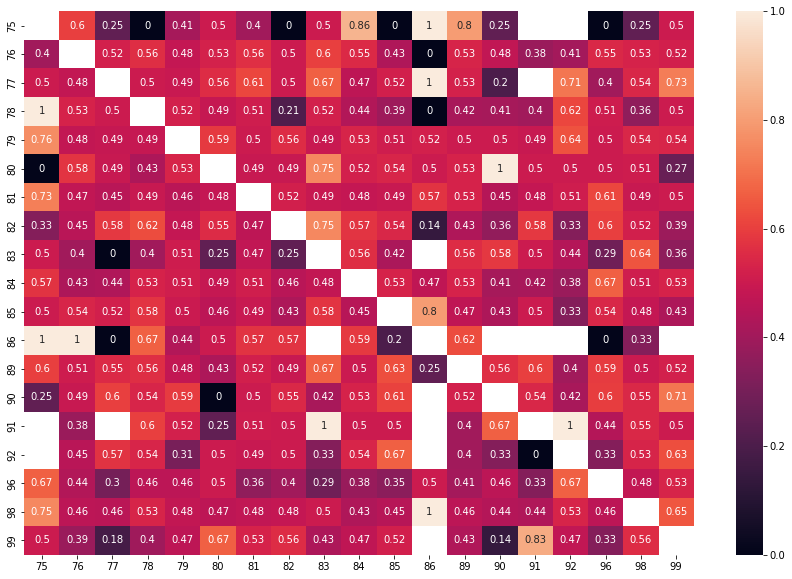

In [69]:
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt

plt.subplots(figsize=(15,10))  
sns.heatmap(champions_won_percentage.loc[75:100, 75:100], annot=True)#, cmap='RdYlGn_r')
#champions_synergy.style.background_gradient(cmap='Blues')

In [94]:
df_BLUE[df_BLUE.game_id == game_id_unique[:1][0]]

,name,id,role,champion_name,champion_id,gold_15,kills_assists_15,deaths_15,total_gold,total_cs,total_kills,total_monster_kills,total_assists,total_deaths,total_damage_taken,total_damage_dealt,win,side,game_id
18765,Smurf,197966.0,TOP,Trundle,48,5175.0,8.0,3.0,15494,294,0,15,8,3,36337,241203,True,BLUE,2016 International Wildcard Invitational/Score...
18766,PvPStejos,194522.0,JGL,Graves,104,4865.0,11.0,2.0,16049,177,6,148,5,2,25664,231200,True,BLUE,2016 International Wildcard Invitational/Score...
18767,Kira,172113.0,MID,Lissandra,127,5533.0,14.0,2.0,16549,325,3,25,11,2,25513,252607,True,BLUE,2016 International Wildcard Invitational/Score...
18768,Onesh0tiq,188541.0,BOT,Lucian,236,5722.0,13.0,1.0,18339,356,6,15,7,1,15931,251707,True,BLUE,2016 International Wildcard Invitational/Score...
18769,Likkrit,179739.0,SUP,Tahm Kench,223,3386.0,10.0,2.0,12309,80,1,6,9,2,23811,56257,True,BLUE,2016 International Wildcard Invitational/Score...


TypeError: unsupported operand type(s) for -: 'list' and 'int'

## Average win rate of the champions against the opposite champions

### Win rate of champions against each of the other team's champion

In [81]:
#available_champions = list(df_frequency.index)
df_BLUE_RED = pd.merge(left=df_BLUE, right=df_RED, left_on= 'game_id', right_on= 'game_id')
df = df_BLUE_RED[['champion_id_x', 'champion_id_y', 'win_x', 'role_x', 'role_y']]#.groupby('champion_id_x').value_counts()
df.head()

,champion_id_x,champion_id_y,win_x,role_x,role_y
0,13,54,True,TOP,TOP
1,13,203,True,TOP,JGL
2,13,38,True,TOP,MID
3,13,18,True,TOP,BOT
4,13,12,True,TOP,SUP


In [82]:
#times that a given champion won or lost against another champion
champion_vs_champion = pd.DataFrame(df.value_counts())
champion_vs_champion

0
champion_id_x champion_id_y win_x role_x role_y     
498           145           True  BOT    BOT     389
12            201           True  SUP    SUP     389
201           12            True  SUP    SUP     357
412           201           True  SUP    SUP     353
201           12            False SUP    SUP     341
...                                              ...
85            18            True  SUP    BOT       1
              19            False SUP    JGL       1
              20            False TOP    MID       1
                            True  BOT    JGL       1
876           875           True  TOP    JGL       1

[90473 rows x 1 columns]

In [83]:
champion_vs_champion.loc[(12, 201)]

/tmp/ipykernel_14445/160690174.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  champion_vs_champion.loc[(12, 201)]


0
win_x role_x role_y     
True  SUP    SUP     389
False SUP    SUP     321
      MID    SUP       1
      SUP    JGL       1
      TOP    SUP       1
True  SUP    JGL       1

In [84]:
total_champion_vs_champion = pd.DataFrame(df_BLUE_RED[['champion_id_x', 'champion_id_y']].value_counts())
total_champion_vs_champion

0
champion_id_x champion_id_y     
12            201            714
201           12             708
498           145            674
201           412            636
412           201            615
...                          ...
19            31               1
75            266              1
              254              1
19            44               1
75            106              1

[20775 rows x 1 columns]

In [44]:
#percentage of times that a champion has lost or won against another champion
rate_champion_vs_champion = champion_vs_champion.div(total_champion_vs_champion)
rate_champion_vs_champion

0
champion_id_x champion_id_y win_x          
1             2             False  0.500000
                            True   0.500000
              3             False  1.000000
              4             False  1.000000
              7             False  1.000000
...                                     ...
876           555           False  0.500000
              777           False  0.533333
                            True   0.466667
              875           True   0.551020
                            False  0.448980

[37444 rows x 1 columns]

In [45]:
rate_champion_vs_champion.loc[(12)]
####win rate per againts a champion against the champion of the other team in the same role
##played with the same role (keep an eye!)

0
champion_id_y win_x          
1             True   0.666667
              False  0.333333
2             True   0.650000
              False  0.350000
3             False  0.529412
...                       ...
777           False  0.500000
875           True   0.707317
              False  0.292683
876           False  0.518182
              True   0.481818

[293 rows x 1 columns]

In [46]:
float(rate_champion_vs_champion.loc[(12, 201, True)])

0.5520833333333334

### Blue Champions average win rate against each of the 5 red champions (later averaged per game_id)

In [47]:
champion_x = list(df_BLUE_RED.champion_id_x)
champion_y = list(df_BLUE_RED.champion_id_y)

column1 = []
column2 = []
column3 = []
column4 = []
column5 = []

for num in range(int(len(champion_x)/5)):
    try:
        column1.append(float(rate_champion_vs_champion.loc[(champion_x[5*num], champion_y[5*num], True)]))
    except:
        column1.append(0)
    try:
        column2.append(float(rate_champion_vs_champion.loc[(champion_x[5*num+1], champion_y[5*num+1], True)]))
    except:    
        column2.append(0)
    try:
        column3.append(float(rate_champion_vs_champion.loc[(champion_x[5*num+2], champion_y[5*num+2], True)]))
    except:
        column3.append(0)
    try:
        column4.append(float(rate_champion_vs_champion.loc[(champion_x[5*num+3], champion_y[5*num+3], True)]))
    except:
        column4.append(0)
    try:
        column5.append(float(rate_champion_vs_champion.loc[(champion_x[5*num+4], champion_y[5*num+4], True)]))
    except:
        column5.append(0)

        
"""This cell returns each blue champion winning rate per 5 of the red team champions"""
win_rate_champion_vs_champion = pd.DataFrame(np.array([column1, column2, column3, column4, column5]).T, columns=['rate_champion_1', 'rate_champion_2', 'rate_champion_3', 'rate_champion_4', 'rate_champion_5'])
win_rate_champion_vs_champion['blue_champ_id'] = df_BLUE_RED.champion_id_x

In [49]:
"""This cell returns each blue champion avergage winning rate for the 5 champions in the red team"""
win_rate_champion_vs_champion.mean(axis=1)

0         6.384466
1         6.382893
2         6.497394
3         6.426222
4         6.424693
            ...   
141275    1.473143
141276    1.440393
141277    1.415992
141278    1.425620
141279    1.447481
Length: 141280, dtype: float64

In [50]:
"""Inlcude the average win rate of every blue champion against the 5 champions in the red team"""
df_banana = pd.merge(df_BLUE, win_rate_champion_vs_champion, left_index=True, right_index=True)
df_banana[['champion_name', 'champion_id', 'rate_champion_1','rate_champion_2','rate_champion_3','rate_champion_4','rate_champion_5']]

,champion_name,champion_id,rate_champion_1,rate_champion_2,rate_champion_3,rate_champion_4,rate_champion_5
0,Dr. Mundo,36,0.363636,0.470588,0.564103,0.434783,0.473684
1,Xin Zhao,5,0.433333,0.450000,0.500000,0.384615,0.529412
2,Cassiopeia,69,0.537037,0.556522,0.515152,0.680000,0.695652
3,Ezreal,81,0.492063,0.584718,0.455000,0.460526,0.565022
4,Morgana,25,0.479167,0.637168,0.506849,0.442623,0.482353
...,...,...,...,...,...,...,...
141275,Gangplank,41,0.689655,0.586667,0.434783,0.538012,0.589744
141276,Sejuani,113,0.550000,0.521277,0.496855,0.490066,0.584158
141277,Corki,42,0.480769,0.488584,0.526882,0.527273,0.472441
141278,Sivir,15,0.524590,0.438017,0.578947,0.472340,0.539823


In [51]:
df_BLUE_win_rate = pd.merge(df_BLUE, pd.DataFrame(win_rate_champion_vs_champion.mean(axis=1)), left_index=True, right_index=True)
df_BLUE_win_rate#[['champion_name', 'champion_id', 0]]

,name,id,role,champion_name,champion_id,gold_15,kills_assists_15,deaths_15,total_gold,total_cs,total_kills,total_monster_kills,total_assists,total_deaths,total_damage_taken,total_damage_dealt,win,side,game_id,0
0,LukasNegro,180733.0,TOP,Dr. Mundo,36,4860.0,4.0,4.0,9920,246,0,1,4,4,27971,114533,False,BLUE,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,6.384466
1,Rod,196384.0,JGL,Xin Zhao,5,4508.0,5.0,2.0,9386,181,1,151,4,2,24232,146123,False,BLUE,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,6.382893
2,Rakyz,194807.0,MID,Cassiopeia,69,4851.0,1.0,3.0,12262,310,1,28,0,3,21271,182752,False,BLUE,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,6.497394
3,Warangelus,203963.0,BOT,Ezreal,81,6362.0,6.0,4.0,12160,280,2,15,4,4,14588,173127,False,BLUE,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,6.426222
4,Shadow,212989.0,SUP,Morgana,25,3639.0,6.0,4.0,7527,21,2,0,4,4,13196,40300,False,BLUE,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,6.424693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141275,Khan,171549.0,TOP,Gangplank,41,4369.0,4.0,6.0,13628,291,0,8,4,6,28847,272147,False,BLUE,LCK/2019 Season/Summer Season/Scoreboards/Week...,1.473143
141276,Clid,126245.0,JGL,Sejuani,113,4704.0,5.0,4.0,10770,150,2,123,3,4,25724,123159,False,BLUE,LCK/2019 Season/Summer Season/Scoreboards/Week...,1.440393
141277,Faker,158918.0,MID,Corki,42,5234.0,3.0,2.0,15381,384,1,38,2,2,16005,259670,False,BLUE,LCK/2019 Season/Summer Season/Scoreboards/Week...,1.415992
141278,Teddy,200789.0,BOT,Sivir,15,5448.0,4.0,2.0,16986,426,2,39,2,2,14173,321584,False,BLUE,LCK/2019 Season/Summer Season/Scoreboards/Week...,1.425620


In [52]:
df_BLUE_mean_win_rate = df_BLUE_win_rate[['game_id', 0]].groupby('game_id').mean()
df_BLUE_mean_win_rate.reset_index(level=0, inplace=True)
df_BLUE_mean_win_rate['champion_vs_champion_mean_win_rate'] = df_BLUE_mean_win_rate[0]
df_BLUE_mean_win_rate.drop(0, axis=1, inplace=True)
df_BLUE_mean_win_rate.head(10)

,game_id,champion_vs_champion_mean_win_rate
0,2016 International Wildcard Invitational/Score...,37.604190
1,2016 International Wildcard Invitational/Score...,18.123818
2,2016 International Wildcard Invitational/Score...,13.925812
3,2016 International Wildcard Invitational/Score...,13.126628
4,2016 International Wildcard Invitational/Score...,13.978497
5,2016 International Wildcard Invitational/Score...,2.460013
6,2016 International Wildcard Invitational/Score...,0.798985
7,2016 International Wildcard Invitational/Score...,69.132323
8,2016 International Wildcard Invitational/Score...,58.794709
9,2016 International Wildcard Invitational/Score...,1.804435


# ML model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn import set_config; set_config(display='diagram')


# Impute then Scale for numerical variables: 
num_transformer = make_pipeline(
                    SimpleImputer(strategy = 'mean'),
                    MinMaxScaler())

# Encode categorical variables
cat_transformer = OneHotEncoder(sparse = False)#, handle_unknown='ignore')

# Paralellize "num_transformer" and "One hot encoder"
preproc = make_column_transformer(
    (num_transformer, make_column_selector(dtype_include=['float64'])),
    (cat_transformer, make_column_selector(dtype_include=['object','bool'])),
    remainder='passthrough')

#add model
pipe = make_pipeline(preproc, LogisticRegression(solver='liblinear'))
pipe

In [ ]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit(df_normalized_teams.winner).transform(df_normalized_teams.winner)
X_pre = df_BLUE.drop(['name', 'id', 'win', 'champion_id', 'side'], axis=1).groupby('game_id').sum()
X = X_pre

In [ ]:
X.info()

In [ ]:
df_BLUE.info()

In [ ]:
# Train pipeline
pipe.fit(X_train,y_train)

# Score model
pipe.score(X_test,y_test)

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross validate pipeline
cross_val_score(pipe, X_train, y_train, cv=10, scoring='accuracy').mean()

In [ ]:
# Check predictions
pipe.predict(X_test.iloc[0:5]), y_test[0:5]

In [ ]:
from sklearn import metrics

predicted = pipe.predict(X_test)
print(metrics.accuracy_score(y_test, predicted))
print(metrics.classification_report(y_test, predicted)) 

In [ ]:
np.unique(predicted)

In [ ]:
model = pipe[-1]

In [ ]:
model.coef_